# SWING Example Notebook

Swing components are now supported in Kotlin Notebooks.

The support will differ depending on the session run mode (see Notebook Plugin Settings):

- **Run in a separate process (default):** In this mode, Swing support is limited.
  It is only possible for the kernel to render a static screenshot of the current state
  of the UI. This will be returned as standard notebook output image.

- **Run in the process:** In this mode we can render the Swing output directly in IDEA as
  notebook output, and it will be possible to interact with it. Beware, that due to how
  Swing works internally, there are restrictions to how Swing components are configured.
  See the Warnings sections for more details.

  This mode is currently hidden behind a Registry flag `kotlin.notebook.allow.embedded.kernel`
  which must be enabled first. Then the Run Mode can be changed in the Notebook settings.
  It is being moved to the Notebook toolbar, so its location might vary depending on the
  plugin version.

Regardless of the mode used, A static image of the Swing component will be stored inside
the normal notebook file as the cell output. So if you share the file with others or on
Github, this is what they will see when the file is opened for the first time.

Note, if the Kotlin Notebook is run outside IntelliJ, e.g. inside Jupyter. It runs as the
though in "Run in a separate process"-mode.


## Warnings

* Due to the way Swing works, it isn't possible to have the same Swing component shown in multiple outputs. The Swing rendering engine will remove it from earlier outputs and only show it in the latest one.

* EXIT_ON_CLOSE does not work on `JFrame`, instead `DISPOSE_ON_CLOSE` must be used.

* When creating inline Swing components, `size` must be set to display it.

* Starting Swing components from inside the IDEA process will make them inherit IDEA's theme. There is
  currently no way to override this.


# Compose Interop

Kotlin Notebooks does currently not support the Compose Compiler Plugin. This means it isn't possible to create `@Composeable` functions directly. Enabling this require changes in the Kotlin Compiler that is coming in Kotlin 2.1. See https://youtrack.jetbrains.com/issue/KTNB-650/Compose-Renderers-API for more information.



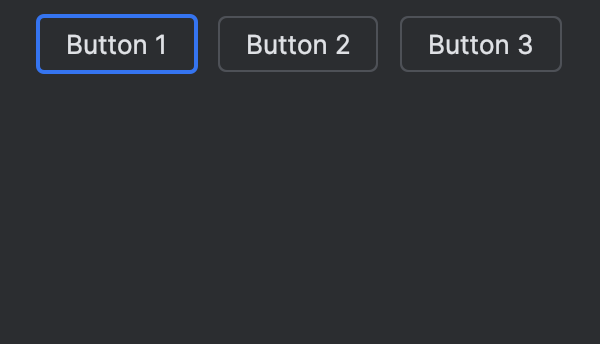

In [1]:
// Display a JFrame
// Note, this will not be shown in the notebook, but will be shown as a floating window.
// To render the JFrame inline, you will need to pull out the content panenl of the JFrame
// but be aware that the size might be wrong.
import java.awt.Color
import java.awt.Dimension
import java.awt.GraphicsConfiguration
import java.awt.RenderingHints
import java.awt.image.BufferedImage
import java.io.File
import javax.swing.*

val frame = JFrame("Color Changer")
frame.defaultCloseOperation = JFrame.DISPOSE_ON_CLOSE // EXIT_ON_CLOSE doesn't work
frame.preferredSize = Dimension(300, 200)
val panel = JPanel()
//panel.preferredSize = Dimension(300, 200)
val button1 = JButton("Button 1")
val button2 = JButton("Button 2")
val button3 = JButton("Button 3")
button1.addActionListener { panel.background = Color.RED }
button2.addActionListener { panel.background = Color.GREEN }
button3.addActionListener { panel.background = Color.BLUE }
panel.add(button1)
panel.add(button2)
panel.add(button3)
frame.add(panel)
frame.pack()
frame.isVisible = true
frame // Frames are shown outside IDEA

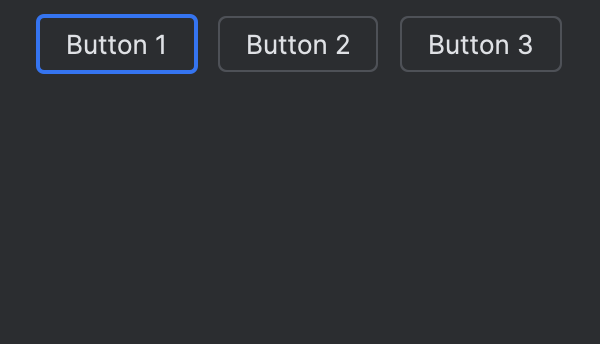

In [2]:
// Display a JDialog
// Note, this will not be shown in the notebook, but will be shown as a floating window.
// To render the JDialog inline, you will need to pull out the content panenl of the JDialog
// but be aware that the size might be wrong.
val dialog = JDialog()
dialog.defaultCloseOperation = JFrame.DISPOSE_ON_CLOSE // EXIT_ON_CLOSE doesn't work
dialog.preferredSize = Dimension(300, 200)
val panel = JPanel()
//panel.preferredSize = Dimension(300, 200)
val button1 = JButton("Button 1")
val button2 = JButton("Button 2")
val button3 = JButton("Button 3")
button1.addActionListener { panel.background = Color.RED }
button2.addActionListener { panel.background = Color.GREEN }
button3.addActionListener { panel.background = Color.BLUE }
panel.add(button1)
panel.add(button2)
panel.add(button3)
dialog.add(panel)
dialog.pack()
dialog.isVisible = true
dialog // Dialogs are shown outside IDEA

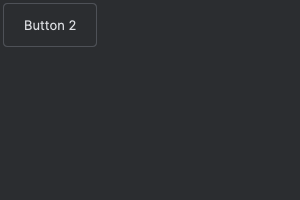

In [3]:
// Display a JPanel
// JPanels will be displayed inline in
import java.awt.Color
import java.awt.Dimension
import java.awt.GraphicsConfiguration
import java.awt.RenderingHints
import java.awt.image.BufferedImage
import java.io.File
import javax.swing.*

val panel = JPanel()
panel.size = Dimension(300, 200)
panel.preferredSize = Dimension(300, 200)
val button1 = JButton("Button 2")
button1.size = Dimension(100, 50)
panel.add(button1)
panel.isVisible = true
panel // Panels are shown inside IDEA